#### Detect Cycle in a Directed Graph

Given the root of a Directed graph , The task is to check whether the graph contains a cycle or not.

Input: N = 4, E = 6

Output: Yes

Explanation: The diagram clearly shows a cycle 0 -> 2 -> 0

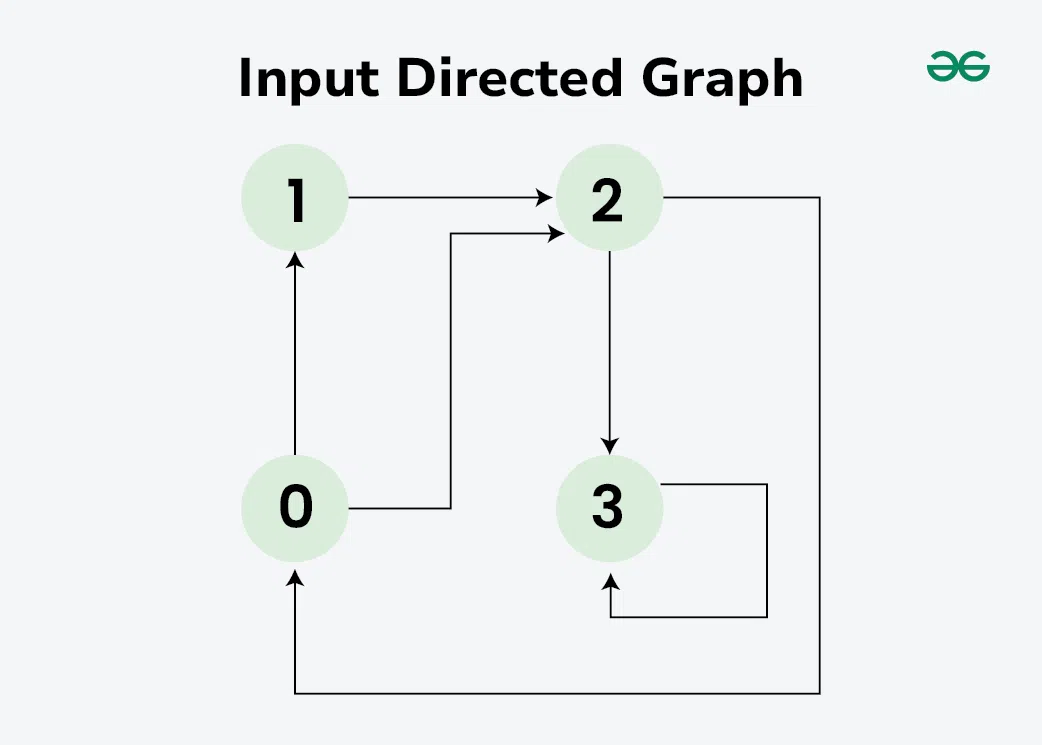

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/Input-Directed-Graph.jpeg")

Input: N = 4, E = 4

Output: No

Explanation: The diagram clearly shows no cycle.

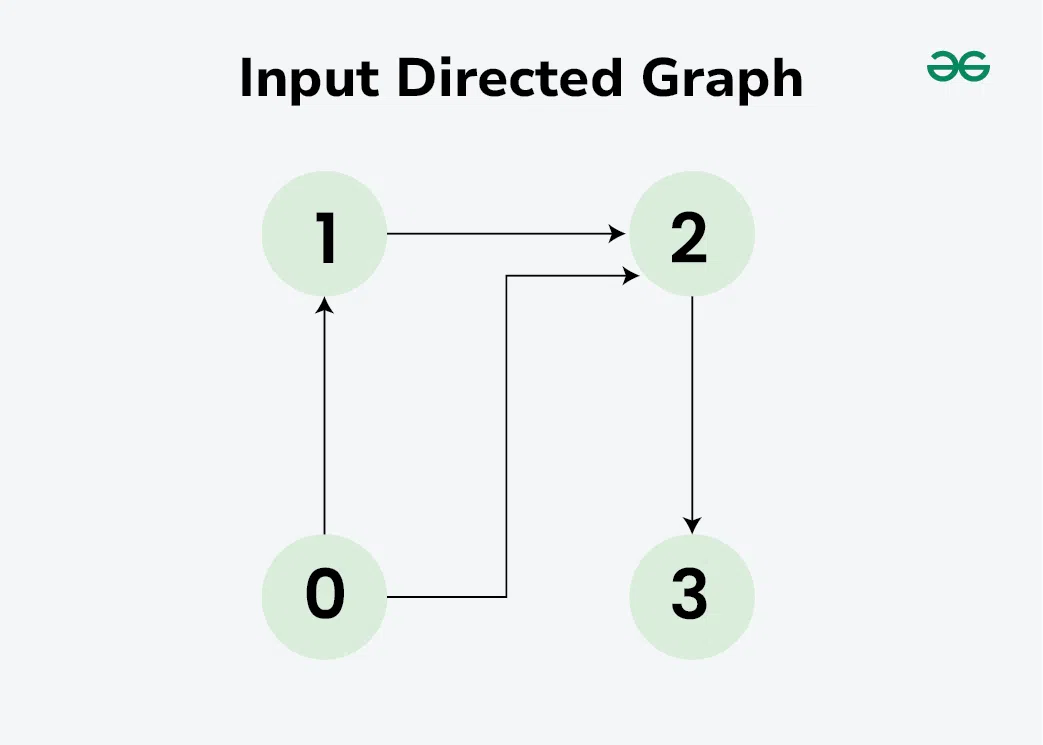

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/Input-Directed-Graph--2.jpeg")

##### Detect Cycle in a Directed Graph using DFS:

To find cycle in a directed graph we can use the Depth First Traversal (DFS) technique. It is based on the idea that there is a cycle in a graph only if there is a back edge [i.e., a node points to one of its ancestors in a DFS tree] present in the graph.

To detect a back edge, we need to keep track of the nodes visited till now and the nodes that are in the current recursion stack [i.e., the current path that we are visiting]. If during recursion, we reach a node that is already in the recursion stack, there is a cycle present in the graph.

##### Note: 

If the graph is disconnected then get the DFS forest and check for a cycle in individual trees by checking back edges.

Step-by-step algorithm:

1. Create a recursive dfs function that has the following parameters – current vertex, visited array, and recursion stack .
2. Mark the current node as visited and also mark the index in the recursion stack.
3. Iterate a loop for all the vertices and for each vertex, call the recursive function if it is not yet visited (This step is done to make sure that if there is a forest of graphs, we are checking each forest):

    - In each recursion call, Find all the adjacent vertices of the current vertex which are not visited:

        - If an adjacent vertex is already marked in the recursion stack then return true .

        - Otherwise, call the recursive function for that adjacent vertex.

    - While returning from the recursion call, unmark the current node from the recursion stack, to represent that the current node is no longer a part of the path being traced.

4. If any of the functions returns true , stop the future function calls and return true as the answer

#### Illustration:

Below is the graph showing how to detect cycle in a graph using DFS:

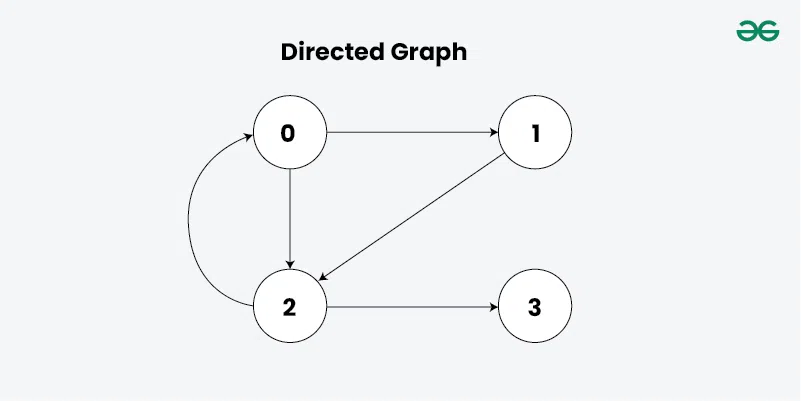

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/1.jpeg")

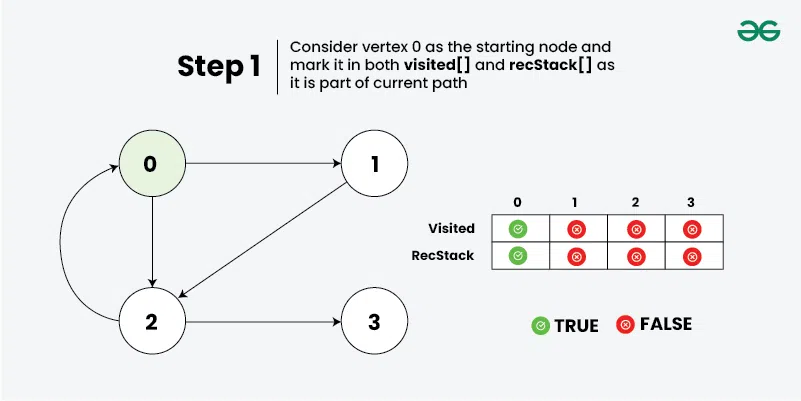

In [7]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/2.jpeg")

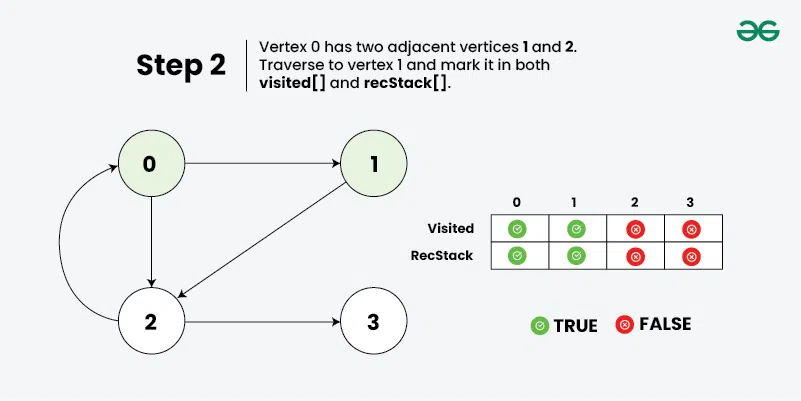

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/3.jpeg")

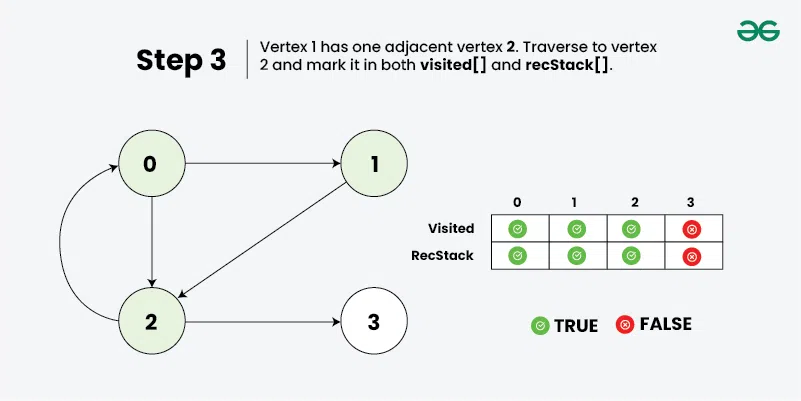

In [9]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/4.jpeg")

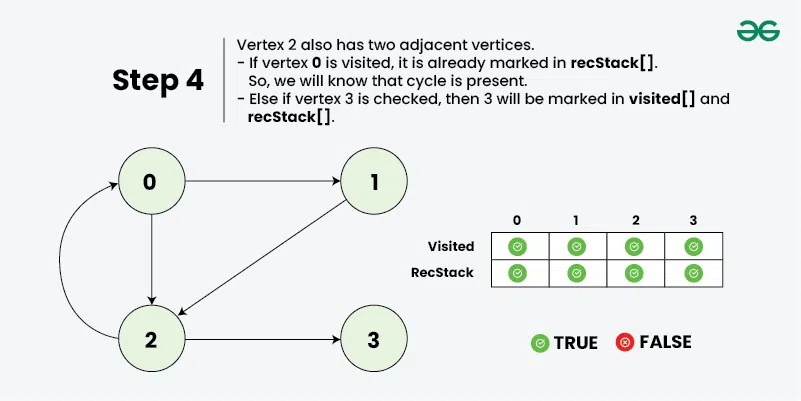

In [10]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/5.jpeg")

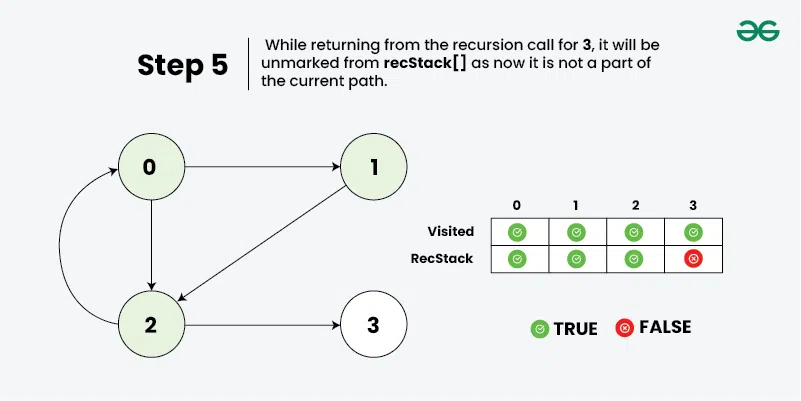

In [11]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/6.jpeg")

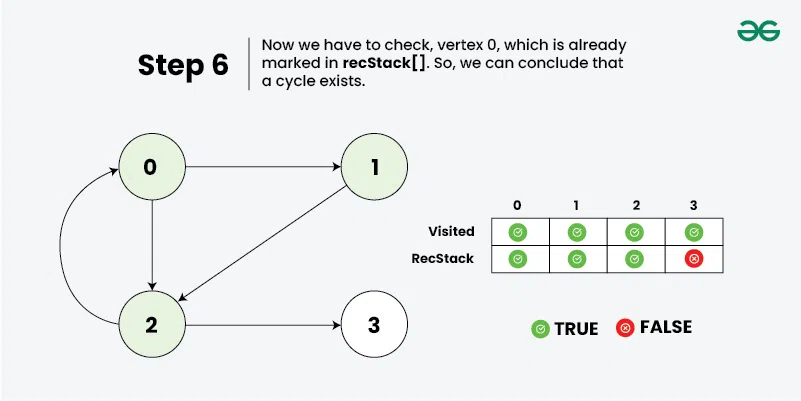

In [12]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/7.jpeg")

In [5]:
from collections import defaultdict

class Graph():
    def __init__(self, vertices):
        self.graph = defaultdict(list)
        self.V = vertices

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def isCyclicUtil(self, v, visited, recStack):
        visited[v] = True
        recStack[v] = True
        for neighbour in self.graph[v]:
            if visited[neighbour] == False:
                if self.isCyclicUtil(neighbour, visited, recStack) == True:
                    return True
            elif recStack[neighbour] == True:
                return True

        recStack[v] = False
        return False

    def isCyclic(self):
        visited = [False] * (self.V + 1)
        recStack = [False] * (self.V + 1)
        for node in range(self.V):
            if visited[node] == False:
                if self.isCyclicUtil(node, visited, recStack) == True:
                    return True
        return False

if __name__ == '__main__':
    g = Graph(4)
    g.addEdge(0, 1)
    g.addEdge(0, 2)
    g.addEdge(1, 2)
    g.addEdge(2, 0)
    g.addEdge(2, 3)
    g.addEdge(3, 3)

    if g.isCyclic() == 1:
        print("Graph contains cycle")
    else:
        print("Graph doesn't contain cycle")

Graph contains cycle


##### Time Complexity: O(V + E)

the Time Complexity of this method is the same as the time complexity of DFS traversal which is O(V+E).

##### Auxiliary Space: O(V)

To store the visited and recursion stack O(V) space is needed.

In [21]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size  

    def add_edge(self, u, v):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = 1
            #self.adj_matrix[v][u] = 1 <- used for undirected Graphs

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def print_graph(self):
        print("Adjacency Matrix:")
        for row in self.adj_matrix:
            print(' '.join(map(str, row)))
        print("\nVertex Data:")
        for vertex, data in enumerate(self.vertex_data):
            print(f"Vertex {vertex}: {data}")
            
    def dfs_util(self, v, visited, recStack):
        visited[v] = True
        recStack[v] = True
        print("Current vertex:",self.vertex_data[v])

        for i in range(self.size):
            if self.adj_matrix[v][i] == 1:
                if not visited[i]:
                    if self.dfs_util(i, visited, recStack):
                        return True
                elif recStack[i]:
                    return True
        
        recStack[v] = False
        return False
    
    def is_cyclic(self):
        visited = [False] * self.size
        recStack = [False] * self.size
        for i in range(self.size):
            if not visited[i]:
                print() #new line
                if self.dfs_util(i, visited, recStack):
                    return True
        return False

g = Graph(7)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(3, 0)  # D -> A
g.add_edge(0, 2)  # A -> C
g.add_edge(2, 1)  # C -> B
g.add_edge(2, 4)  # C -> E
g.add_edge(1, 5)  # B -> F
g.add_edge(4, 0)  # E -> A
g.add_edge(2, 6)  # C -> G
g.print_graph()
print("\nGraph has cycle:", g.is_cyclic())

Adjacency Matrix:
0 0 1 0 0 0 0
0 0 0 0 0 1 0
0 1 0 0 1 0 1
1 0 0 0 0 0 0
1 0 0 0 0 0 0
0 0 0 0 0 0 0
0 0 0 0 0 0 0

Vertex Data:
Vertex 0: A
Vertex 1: B
Vertex 2: C
Vertex 3: D
Vertex 4: E
Vertex 5: F
Vertex 6: G

Current vertex: A
Current vertex: C
Current vertex: B
Current vertex: F
Current vertex: E

Graph has cycle: True


#### Detect Cycle in a Directed Graph using Topological Sorting:

Here we are using Kahn’s algorithm for topological sorting, if it successfully removes all vertices from the graph, it’s a DAG with no cycles. If there are remaining vertices with in-degrees greater than 0 , it indicates the presence of at least one cycle in the graph. Hence, if we are not able to get all the vertices in topological sorting then there must be at least one cycle.

In [4]:
from collections import deque

class Graph:
    def __init__(self, V):
        self.V = V
        self.adj = [[] for _ in range(V)]

    def addEdge(self, v, w):
        self.adj[v].append(w)

    def isCyclic(self):
        inDegree = [0] * self.V
        q = deque()
        visited = 0
        for u in range(self.V):
            for v in self.adj[u]:
                inDegree[v] += 1

        for u in range(self.V):
            if inDegree[u] == 0:
                q.append(u)

        while q:
            u = q.popleft()
            visited += 1
            for v in self.adj[u]:
                inDegree[v] -= 1
                if inDegree[v] == 0:
                    q.append(v)

        return visited != self.V

g = Graph(6)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 3)
g.addEdge(4, 1)
g.addEdge(4, 5)
g.addEdge(5, 3)

if g.isCyclic():
    print("Graph contains a cycle.")
else:
    print("Graph does not contain a cycle.")

Graph does not contain a cycle.


##### Time Complexity: O(V + E)

the time complexity of this method is the same as the time complexity of DFS traversal which is O(V+E).

##### Auxiliary Space: O(V). 

To store the visited and recursion stack O(V) space is needed.

#### Detect Cycle in a directed graph using colors:

Given a directed graph, check whether the graph contains a cycle or not. Your function should return true if the given graph contains at least one cycle, else return false.

Input: n = 4, e = 6 

0 -> 1, 0 -> 2, 1 -> 2, 2 -> 0, 2 -> 3, 3 -> 3 

Output: Yes 


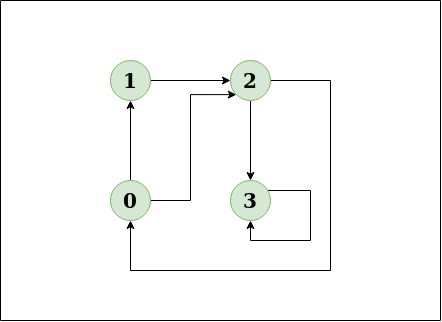

In [1]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/111.png")

Input:n = 4, e = 3 

0 -> 1, 0 -> 2, 1 -> 2, 2 -> 3 

Output:No 

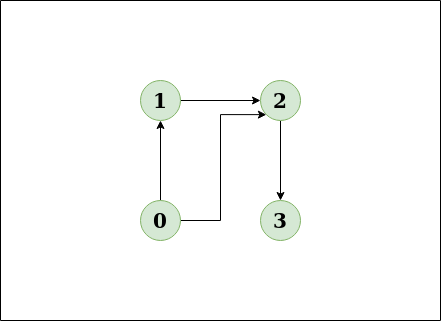

In [2]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/222.png")

##### Solution:

##### Approach: 

Depth First Traversal can be used to detect cycle in a Graph. DFS for a connected graph produces a tree. There is a cycle in a graph only if there is a back edge present in the graph. A back edge is an edge that is from a node to itself (selfloop) or one of its ancestor in the tree produced by DFS. In the following graph, there are 3 back edges, marked with cross sign. It can be observed that these 3 back edges indicate 3 cycles present in the graph.

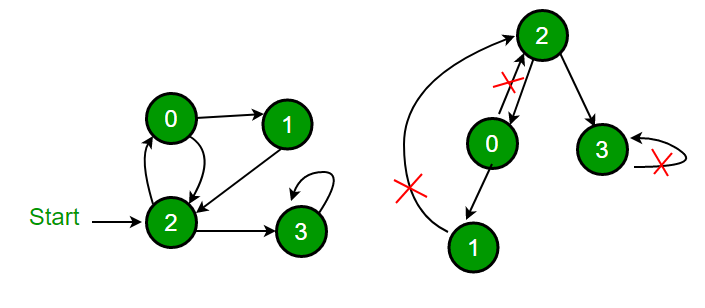

In [3]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/detect-cycle.png")

For a disconnected graph, we get the DFS forest as output. To detect cycle, we can check for cycle in individual trees by checking back edges.

In the previous post, we have discussed a solution that stores visited vertices in a separate array which stores vertices of the current recursion call stack.

In this post, a different solution is discussed. The solution is from CLRS book. The idea is to do DFS of a given graph and while doing traversal, assign one of the below three colours to every vertex. 

WHITE : 

Vertex is not processed yet. Initially, all vertices are WHITE.
GRAY: Vertex is being processed (DFS for this vertex has started, but not finished which means that all descendants (in DFS tree) of this vertex are not processed yet (or this vertex is in the function call stack)

BLACK : 

Vertex and all its descendants are processed. While doing DFS, if an edge is encountered from current vertex to a GRAY vertex, then this edge is back edge and hence there is a cycle. 

##### Algorithm:  

1. Create a recursive function that takes the edge and color array (this can be also kept as a global variable)
2. Mark the current node as GREY.
3. Traverse all the adjacent nodes and if any node is marked GREY then return true as a loop is bound to exist.
4. If any adjacent vertex is WHITE then call the recursive function for that node. If the function returns true. Return true.
5. If no adjacent node is grey or has not returned true then mark the current Node as BLACK and return false.

In [4]:
from collections import defaultdict

class Graph():
	def __init__(self, V):
		self.V = V
		self.graph = defaultdict(list)

	def addEdge(self, u, v):
		self.graph[u].append(v)

	def DFSUtil(self, u, color):
		color[u] = "GRAY"
		for v in self.graph[u]:
			if color[v] == "GRAY":
				return True

			if color[v] == "WHITE" and self.DFSUtil(v, color) == True:
				return True

		color[u] = "BLACK"
		return False

	def isCyclic(self):
		color = ["WHITE"] * self.V

		for i in range(self.V):
			if color[i] == "WHITE":
				if self.DFSUtil(i, color) == True:
					return True
		return False

g = Graph(4)
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)
print ("Graph contains cycle" if g.isCyclic() == True else "Graph doesn't contain cycle")
							

Graph contains cycle


##### Time complexity: O(V + E)

where V is the number of vertices and E is the number of edges in the graph.

##### Space Complexity :O(V)

Since an extra color array is needed of size V.

#### Detect a negative cycle in a directed Graph | (Bellman Ford):

Given a directed weighted graph, the task is to find whether the given graph contains any negative-weight cycle or not.

Note: A negative-weight cycle is a cycle in a graph whose edges sum to a negative value.


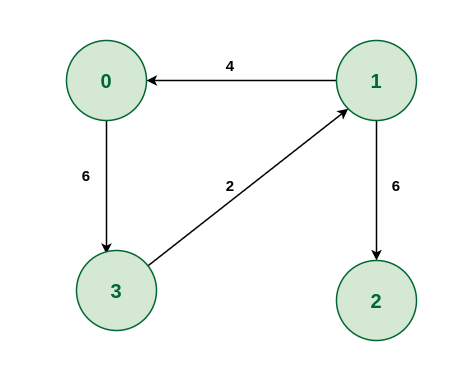

In [5]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/Example1.png")

Output: No


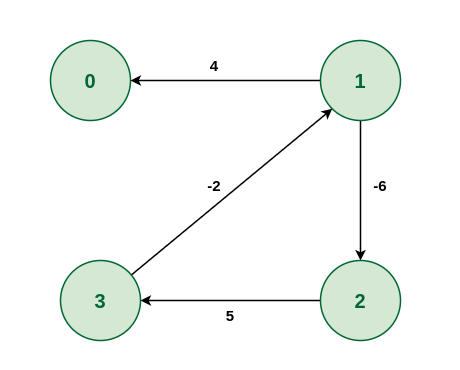

In [6]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/Example2.png")

Output: Yes



#### Algorithm to Find Negative Cycle in a Directed Weighted Graph Using Bellman-Ford:

- Initialize distance array dist[] for each vertex ‘v‘ as dist[v] = INFINITY.

- Assume any vertex (let’s say ‘0’) as source and assign dist = 0.

- Relax all the edges(u,v,weight) N-1 times as per the below condition:

    - dist[v] = minimum(dist[v], distance[u] + weight)

- Now, Relax all the edges one more time i.e. the Nth time and based on the below two cases we can detect the negative cycle:

    - Case 1 (Negative cycle exists): For any edge(u, v, weight), if dist[u] + weight < dist[v]
    
    - Case 2 (No Negative cycle) : case 1 fails for all the edges.

##### Working of Bellman-Ford Algorithm to Detect the Negative cycle in the graph:

Let’s suppose we have a graph which is given below and we want to find whether there exists a negative cycle or not using Bellman-Ford.

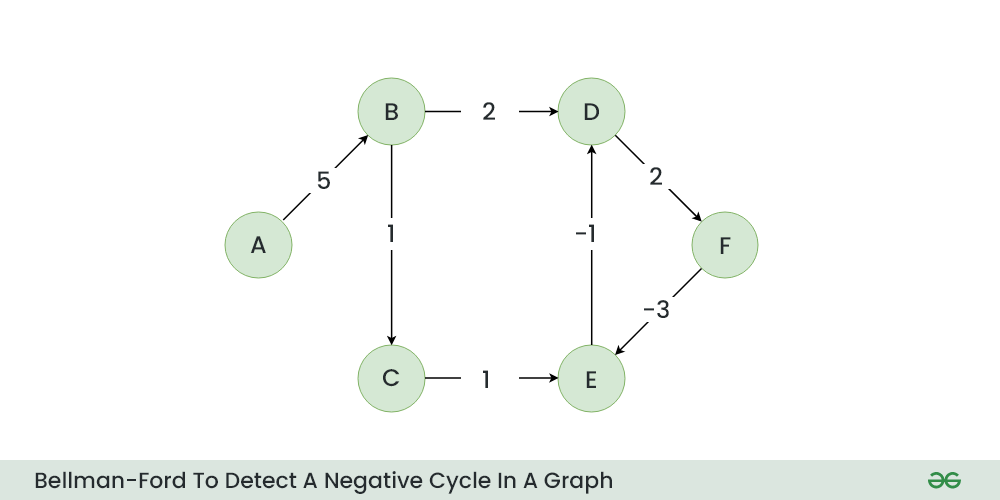

In [8]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-1.png")

Step-1: Initialize a distance array Dist[] to store the shortest distance for each vertex from the source vertex. Initially distance of source will be 0 and Distance of other vertices will be INFINITY.

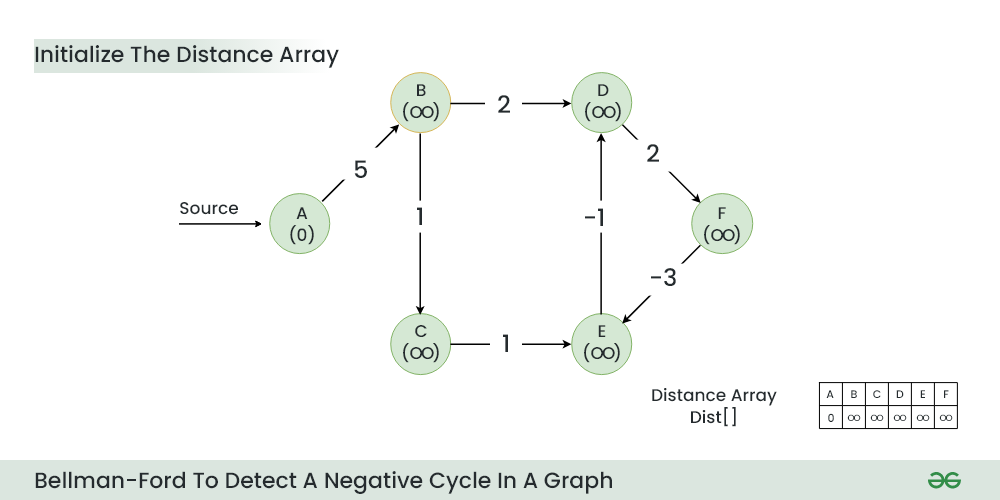

In [9]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-2.png")

Step 2: Start relaxing the edges, during 1st Relaxation:

- Current Distance of B > (Distance of A) + (Weight of A to B) i.e. Infinity > 0 + 5

    - Therefore, Dist[B] = 5

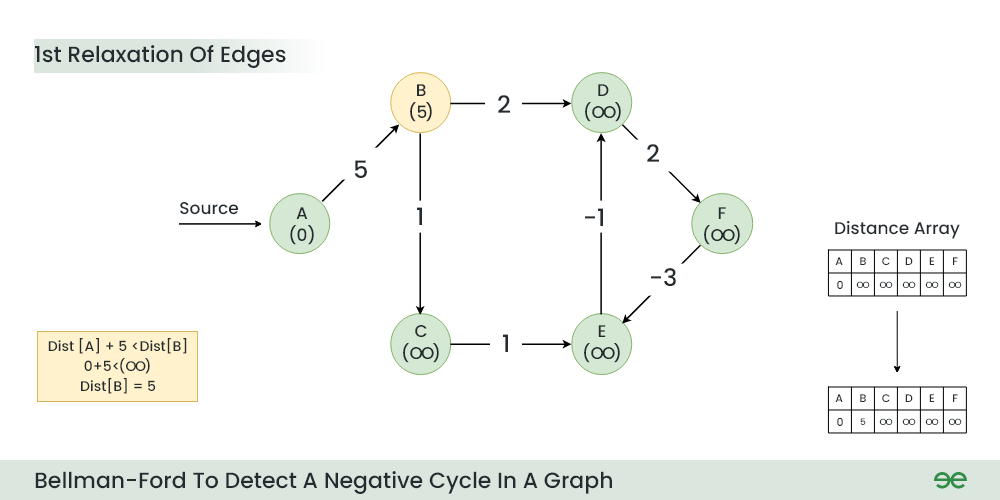

In [10]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-3.png")

Step 3: During 2nd Relaxation:

- Current Distance of D > (Distance of B) + (Weight of B to D) i.e. Infinity > 5 + 2

    - Dist[D] = 7

- Current Distance of C > (Distance of B) + (Weight of B to C) i.e. Infinity > 5 + 1

    - Dist[C] = 6

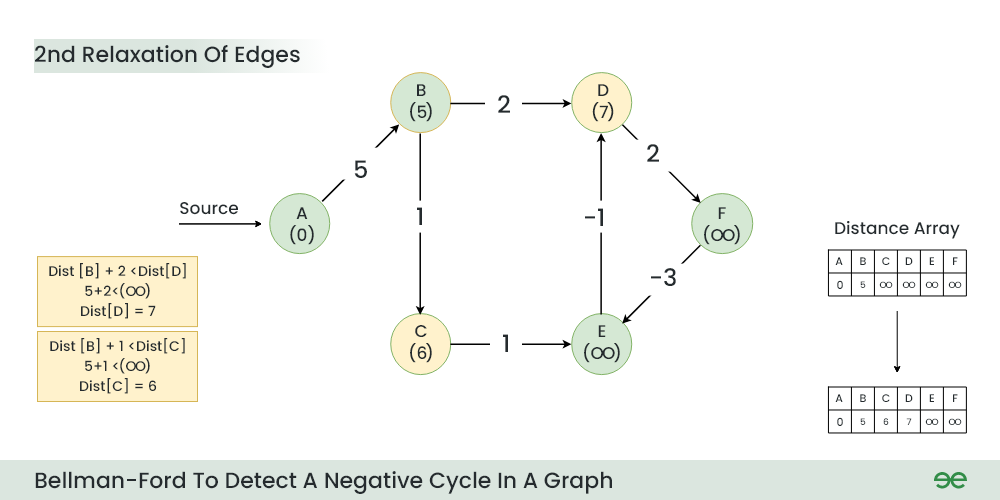

In [11]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-4.png")

Step 4: During 3rd Relaxation:

- Current Distance of F > (Distance of D ) + (Weight of D to F) i.e. Infinity > 7 + 2

    - Dist[F] = 9

- Current Distance of E > (Distance of C ) + (Weight of C to E) i.e. Infinity > 6 + 1

    - Dist[E] = 7

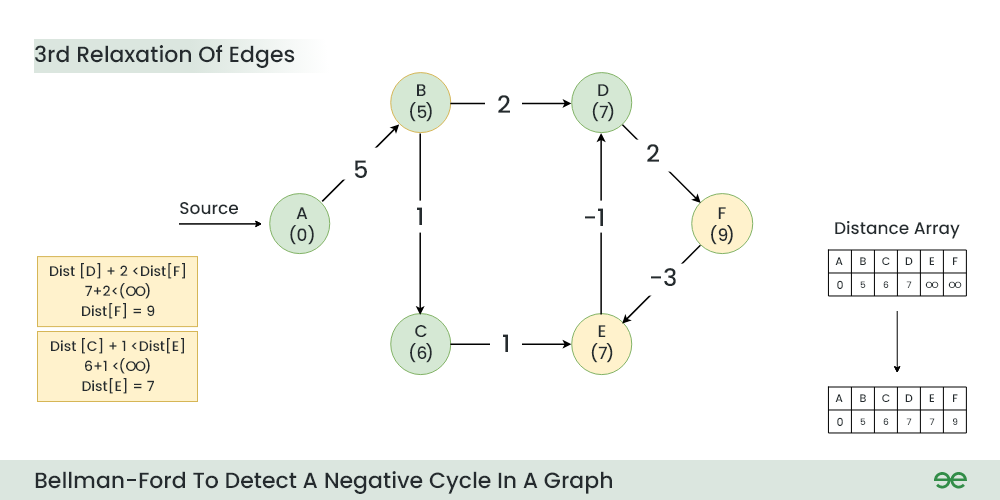

In [12]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-5.png")

Step 5: During 4th Relaxation:

- Current Distance of D > (Distance of E) + (Weight of E to D) i.e. 7 > 7 + (-1)

    - Dist[D] = 6

- Current Distance of E > (Distance of F ) + (Weight of F to E) i.e. 7 > 9 + (-3)

    - Dist[E] = 6

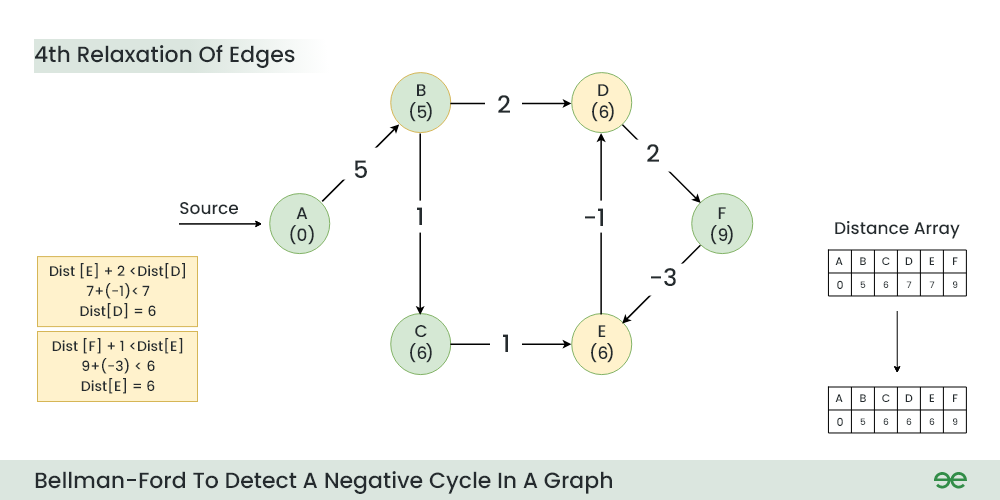

In [13]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-6.png")

Step 6: During 5th Relaxation:

- Current Distance of F > (Distance of D) + (Weight of D to F) i.e. 9 > 6 + 2

    - Dist[F] = 8

- Current Distance of D > (Distance of E ) + (Weight of E to D) i.e. 6 > 6 + (-1)
    - Dist[E] = 5
    
Since the graph h 6 vertices, So during the 5th relaxation the shortest distance for all the vertices should have been calculated.

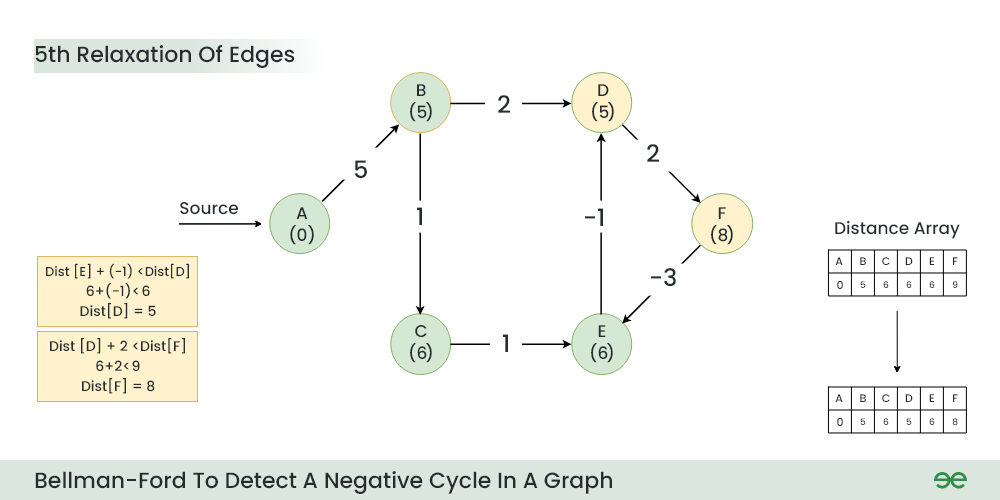

In [14]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-7.png")

Step 7: Now the final relaxation i.e. the 6th relaxation should indicate the presence of negative cycle if there is any changes in the distance array of 5th relaxation.

During the 6th relaxation, following changes can be seen:

- Current Distance of E > (Distance of F) + (Weight of F to E) i.e. 6 > 8 + (-3)

    - Dist[E]=5

- Current Distance of F > (Distance of D ) + (Weight of D to F) i.e. 8 > 5 + 2

    - Dist[F]=7
    
Since we observer changes in the Distance array Hence ,we can conclude the presence of a negative cycle in the graph.

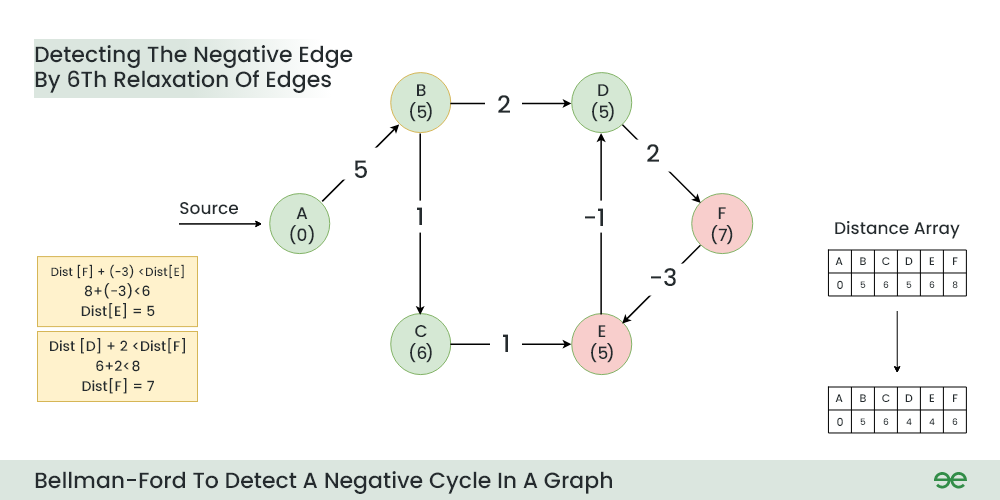

In [15]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/bellman_neg-8.png")

Result: A negative cycle (D->F->E) exists in the graph.

In [7]:
def isNegCycleBellmanFord(src, dist):
	global graph, V, E

	for i in range(V):
		dist[i] = 10**18
	dist[src] = 0

	for i in range(1, V):
		for j in range(E):
			u = graph[j][0]
			v = graph[j][1]
			weight = graph[j][2]
			if (dist[u] != 10**18 and dist[u] + weight < dist[v]):
				dist[v] = dist[u] + weight

	for i in range(E):
		u = graph[i][0]
		v = graph[i][1]
		weight = graph[i][2]
		if (dist[u] != 10**18 and dist[u] + weight < dist[v]):
			return True

	return False

def isNegCycleDisconnected():
	global V, E, graph
	visited = [0]*V
	dist = [0]*V
	for i in range(V):
		if (visited[i] == 0):
			if (isNegCycleBellmanFord(i, dist)):
				return True

			for i in range(V):
				if (dist[i] != 10**18):
					visited[i] = True
	return False

if __name__ == '__main__':
	V = 5
	E = 8 
	graph = [[0, 0, 0] for i in range(8)]

	graph[0][0] = 0
	graph[0][1] = 1
	graph[0][2] = -1

	graph[1][0] = 0
	graph[1][1] = 2
	graph[1][2] = 4

	graph[2][0] = 1
	graph[2][1] = 2
	graph[2][2] = 3

	graph[3][0] = 1
	graph[3][1] = 3
	graph[3][2] = 2

	graph[4][0] = 1
	graph[4][1] = 4
	graph[4][2] = 2

	graph[5][0] = 3
	graph[5][1] = 2
	graph[5][2] = 5

	graph[6][0] = 3
	graph[6][1] = 1
	graph[6][2] = 1

	graph[7][0] = 4
	graph[7][1] = 3
	graph[7][2] = -3

	if (isNegCycleDisconnected()):
		print("Yes")
	else:
		print("No")

No


##### Time Complexity: O(V*E)

 where V and E are the number of vertices in the graph and edges respectively.
##### Auxiliary Space: O(V)

where V is the number of vertices in the graph

#### Detecting negative cycle using Floyd Warshall:

We are given a directed graph. We need compute whether the graph has negative cycle or not. A negative cycle is one in which the overall sum of the cycle comes negative

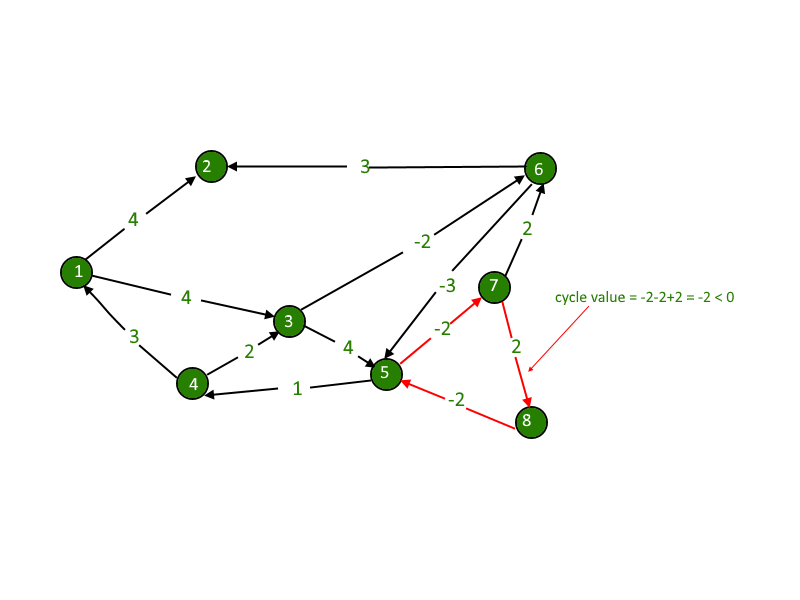

In [17]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/negative_cycle.png")

Negative weights are found in various applications of graphs. For example, instead of paying cost for a path, we may get some advantage if we follow the path.

Input : 

4 4

0 1 1

1 2 -1

2 3 -1

3 0 -1

Output : Yes

The graph contains a negative cycle.

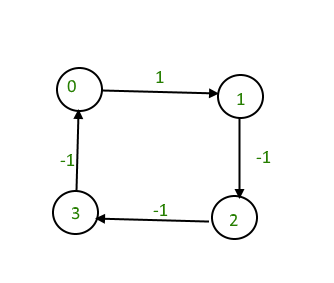

In [18]:
from IPython import display
display.Image("/Users/joeljoseph26/Documents/Education/DSA/Graphs/Cycle Detection/img/negative_cycle121.png")

In this post, Floyd Warshall Algorithm based solution is discussed that works for both connected and disconnected graphs.

Distance of any node from itself is always zero. But in some cases, as in this example, when we traverse further from 4 to 1, the distance comes out to be -2, i.e. distance of 1 from 1 will become -2. This is our catch, we just have to check the nodes distance from itself and if it comes out to be negative, we will detect the required negative cycle.

In [16]:
V = 4
INF = 99999
def negCyclefloydWarshall(graph):
	dist=[[0 for i in range(V+1)]for j in range(V+1)]
	for i in range(V):
		for j in range(V):
			dist[i][j] = graph[i][j]
	
	for k in range(V):
		for i in range(V):
			for j in range(V):
				if (dist[i][k] + dist[k][j] < dist[i][j]):
						dist[i][j] = dist[i][k] + dist[k][j]

	for i in range(V):
		if (dist[i][i] < 0):
			return True

	return False
	
''' Let us create the
	following weighted graph
			1
	(0)----------->(1)
	/|\			 |
	|			 |
-1 |			 | -1
	|			 \|/
	(3)<-----------(2)
		-1	 '''
		
graph = [ [0, 1, INF, INF],
		[INF, 0, -1, INF],
		[INF, INF, 0, -1],
		[-1, INF, INF, 0]]
		
if (negCyclefloydWarshall(graph)):
	print("Yes")
else:
	print("No")

Yes


The time complexity of the Floyd Warshall algorithm is O(V^3) where V is the number of vertices in the graph. This is because the algorithm uses a nested loop structure, where the outermost loop runs V times, the middle loop runs V times and the innermost loop also runs V times. Therefore, the total number of iterations is V * V * V which results in O(V^3) time complexity.

The space complexity of the Floyd Warshall algorithm is O(V^2) where V is the number of vertices in the graph. This is because the algorithm uses a 2D array of size V x V to store the shortest distances between every pair of vertices. Therefore, the total space required is V * V which results in O(V^2) space complexity.

#### Clone a Direct Acyclic Graph:

A directed acyclic graph (DAG) is a graph which doesn’t contain a cycle and has directed edges. We are given a DAG, we need to clone it, i.e., create another graph that has copy of its vertices and edges connecting them.



In [20]:
""" 
Input:

0 - - - > 1 - - - -> 4
|        /  \        ^   
|       /    \       |  
|      /      \      |
|     /        \     |  
|    /          \    |
|   /            \   |
v  v              v  |
2 - - - - - - - - -> 3


Output : Printing the output of the cloned graph gives: 
0-1
1-2
2-3
3-4
1-3
1-4
0-2

"""

' \nInput:\n\n0 - - - > 1 - - - -> 4\n|        /  \\        ^   \n|       /    \\       |  \n|      /      \\      |\n|     /        \\     |  \n|    /          \\    |\n|   /            \\   |\nv  v              v  |\n2 - - - - - - - - -> 3\n\n\nOutput : Printing the output of the cloned graph gives: \n0-1\n1-2\n2-3\n3-4\n1-3\n1-4\n0-2\n\n'

To clone a DAG without storing the graph itself within a hash (or dictionary in Python). To clone, it we basically do a depth-first traversal of the nodes, taking original node’s value and initializing new neighboring nodes with the same value, recursively doing, till the original graph is fully traversed. Below is the recursive approach to cloning a DAG (in Python). We make use of dynamic lists in Python, append operation to this list happens in constant time, hence, fast and efficient initialization of the graph.

##### Approach:

- Initialize an empty hash map to keep track of the visited nodes and their clones.
- Perform a DFS traversal of the original graph.
- For each visited node, create a clone of the node and add it to the hash map.
- For each outgoing edge of the visited node, check if the destination node is already in the hash map. If it is, add the corresponding clone to the clone of the visited node. If it is not, perform a DFS on the destination node and repeat the previous steps.
- Once the DFS traversal is complete, return the clone of the starting node.

In [19]:
class Node():
	def __init__(self, key = None, adj = None):
		self.key = key
		self.adj = adj

def printGraph(startNode, visited):
	if startNode.adj is not None:
		for i in startNode.adj:
			if visited[startNode.key] == False :
				print("edge %s-%s:%s-%s"%(hex(id(startNode)), hex(id(i)), startNode.key, i.key))
				if visited[i.key] == False:
					printGraph(i, visited)
					visited[i.key] = True

def cloneGraph(oldSource, newSource, visited):
	clone = None
	if visited[oldSource.key] is False and oldSource.adj is not None:
		for old in oldSource.adj:
			if clone is None or(clone is not None and clone.key != old.key):
				clone = Node(old.key, [])
			newSource.adj.append(clone)
			cloneGraph(old, clone, visited)
			visited[old.key] = True
	return newSource

n0, n1, n2 = Node(0, []), Node(1, []), Node(2, [])
n3, n4 = Node(3, []), Node(4)
n0.adj.append(n1)
n0.adj.append(n2)
n1.adj.append(n2)
n1.adj.append(n3)
n1.adj.append(n4)
n2.adj.append(n3)
n3.adj.append(n4)

visited = [False]* (5)
print("Graph Before Cloning:-")
printGraph(n0, visited)

visited = [False]* (5)
print("\nCloning Process Starts")
clonedGraphHead = cloneGraph(n0, Node(n0.key, []), visited)
print("Cloning Process Completes.")

visited = [False]*(5)
print("\nGraph After Cloning:-")
printGraph(clonedGraphHead, visited)


Graph Before Cloning:-
edge 0x10daff910-0x10db14c50:0-1
edge 0x10db14c50-0x10db15450:1-2
edge 0x10db15450-0x10db15390:2-3
edge 0x10db15390-0x10db15210:3-4
edge 0x10db14c50-0x10db15390:1-3
edge 0x10db14c50-0x10db15210:1-4
edge 0x10daff910-0x10db15450:0-2

Cloning Process Starts
Cloning Process Completes.

Graph After Cloning:-
edge 0x10d68f850-0x10db15650:0-1
edge 0x10db15650-0x10db15490:1-2
edge 0x10db15490-0x10db15610:2-3
edge 0x10db15610-0x10db15690:3-4
edge 0x10db15650-0x10db15590:1-3
edge 0x10db15650-0x10db15710:1-4
edge 0x10d68f850-0x10db15750:0-2


Creating the DAG by appending adjacent edges to the vertex happens in O(1) time. Cloning of the graph takes O(E+V) time. 

Time Complexity : O(V+E)

Space Complexity : O(V+E)